In [2]:
from pprint import pprint
import sklearn.metrics
import autosklearn.classification
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split


file_path = '../data/clean_data.csv'
df = pd.read_csv(file_path)
df = df.dropna(subset=['Rating'])
y = df['Rating']
X = df.drop('Rating', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_budget = [30, 40, 60, 90, 120]
accuracy = []
precision = []
recall = []
leaderboard = []
config_list = []
for t in time_budget:
    print("Time budget:", t)
    automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=t,
    include = {
        'classifier': ["mlp"],
        'feature_preprocessor': ["no_preprocessing"]
    },
    tmp_folder="tmp/autosklearn_classification_example_tmp2",
    )

    automl.fit(X_train, y_train, dataset_name="airbnb")

    run_key = list(automl.automl_.runhistory_.data.keys())[0]
    run_value = automl.automl_.runhistory_.data[run_key]
    config=automl.automl_.runhistory_.ids_config[run_key.config_id]
    print("Config:", config)
    print("Leaderboard:", automl.leaderboard())
    config_list.append(str(config))
    leaderboard.append(str(automl.leaderboard()))

    predictions = automl.predict(X_test)
    # print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))
    # print("Precision", sklearn.metrics.precision_score(y_test, predictions))
    # print("Recall", sklearn.metrics.recall_score(y_test, predictions))
    accuracy.append(sklearn.metrics.accuracy_score(y_test, predictions))
    precision.append(sklearn.metrics.precision_score(y_test, predictions))
    recall.append(sklearn.metrics.recall_score(y_test, predictions))



Time budget: 30


Fitting to the training data:   0%|          | 0/30 [00:00<?, ?it/s, The total time budget for this task is 0:00:30]/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):


MLPP INITTT


Fitting to the training data:   3%|▎         | 1/30 [00:01<00:29,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-28 20:30:46,384:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   7%|▋         | 2/30 [00:02<00:28,  1.00s/it, The total time budget for this task is 0:00:30]

[WARNING] [2023-11-28 20:30:46,387:Client-AutoMLSMBO(1)::airbnb] Configuration 414 not found
[WARNING] [2023-11-28 20:30:46,387:Client-AutoMLSMBO(1)::airbnb] Configuration 670 not found
[WARNING] [2023-11-28 20:30:46,387:Client-AutoMLSMBO(1)::airbnb] Configuration 576 not found
[WARNING] [2023-11-28 20:30:46,387:Client-AutoMLSMBO(1)::airbnb] Configuration 605 not found
[WARNING] [2023-11-28 20:30:46,387:Client-AutoMLSMBO(1)::airbnb] Configuration 444 not found
[WARNING] [2023-11-28 20:30:46,388:Client-AutoMLSMBO(1)::airbnb] Configuration 624 not found
[WARNING] [2023-11-28 20:30:46,388:Client-AutoMLSMBO(1)::airbnb] Configuration 191 not found
[WARNING] [2023-11-28 20:30:46,388:Client-AutoMLSMBO(1)::airbnb] Configuration 369 not found
[WARNING] [2023-11-28 20:30:46,388:Client-AutoMLSMBO(1)::airbnb] Configuration 262 not found
[WARNING] [2023-11-28 20:30:46,388:Client-AutoMLSMBO(1)::airbnb] Configuration 430 not found
[WARNING] [2023-11-28 20:30:46,388:Client-AutoMLSMBO(1)::airbnb] Confi

Fitting to the training data: 100%|██████████| 30/30 [00:20<00:00,  1.49it/s, The total time budget for this task is 0:00:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and

MLPP INITTT


Fitting to the training data:   2%|▎         | 1/40 [00:01<00:39,  1.00s/it, The total time budget for this task is 0:00:40]

[WARNING] [2023-11-28 20:31:11,475:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-28 20:31:11,475:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-28 20:31:11,476:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   5%|▌         | 2/40 [00:02<00:38,  1.00s/it, The total time budget for this task is 0:00:40]

[WARNING] [2023-11-28 20:31:11,481:Client-AutoMLSMBO(1)::airbnb] Configuration 204 not found
[WARNING] [2023-11-28 20:31:11,481:Client-AutoMLSMBO(1)::airbnb] Configuration 154 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 340 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 470 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 613 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 571 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 172 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 352 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 277 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Configuration 232 not found
[WARNING] [2023-11-28 20:31:11,482:Client-AutoMLSMBO(1)::airbnb] Confi

Fitting to the training data: 100%|██████████| 40/40 [00:30<00:00,  1.32it/s, The total time budget for this task is 0:00:40]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
Fitting to the training data:   0%|          | 0/60 [00:00<?, ?it/s, The total time budget for this task is 0:01:00]/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(X[column]):


MLPP INITTT


Fitting to the training data:   2%|▏         | 1/60 [00:01<00:59,  1.00s/it, The total time budget for this task is 0:01:00]

[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-28 20:31:47,241:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   3%|▎         | 2/60 [00:02<00:58,  1.00s/it, The total time budget for this task is 0:01:00]

[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 1 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 648 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 367 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 574 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 347 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 521 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 282 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 264 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 536 not found
[WARNING] [2023-11-28 20:31:47,244:Client-AutoMLSMBO(1)::airbnb] Configuration 67 not found
[WARNING] [2023-11-28 20:31:47,245:Client-AutoMLSMBO(1)::airbnb] Configur

Fitting to the training data: 100%|██████████| 60/60 [00:49<00:00,  1.21it/s, The total time budget for this task is 0:01:00]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/autosklearn/data/feature_validator.py:298: FutureWarning: is_sparse is deprecated and

MLPP INITTT


Fitting to the training data:   1%|          | 1/90 [00:01<01:29,  1.00s/it, The total time budget for this task is 0:01:30]

[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-28 20:32:41,688:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-28 20:32:41,689:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-28 20:32:41,689:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-28 20:32:41,689:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   2%|▏         | 2/90 [00:02<01:28,  1.00s/it, The total time budget for this task is 0:01:30]

[WARNING] [2023-11-28 20:32:41,699:Client-AutoMLSMBO(1)::airbnb] Configuration 707 not found
[WARNING] [2023-11-28 20:32:41,699:Client-AutoMLSMBO(1)::airbnb] Configuration 524 not found
[WARNING] [2023-11-28 20:32:41,699:Client-AutoMLSMBO(1)::airbnb] Configuration 434 not found
[WARNING] [2023-11-28 20:32:41,699:Client-AutoMLSMBO(1)::airbnb] Configuration 302 not found
[WARNING] [2023-11-28 20:32:41,699:Client-AutoMLSMBO(1)::airbnb] Configuration 587 not found
[WARNING] [2023-11-28 20:32:41,699:Client-AutoMLSMBO(1)::airbnb] Configuration 445 not found
[WARNING] [2023-11-28 20:32:41,700:Client-AutoMLSMBO(1)::airbnb] Configuration 494 not found
[WARNING] [2023-11-28 20:32:41,700:Client-AutoMLSMBO(1)::airbnb] Configuration 653 not found
[WARNING] [2023-11-28 20:32:41,700:Client-AutoMLSMBO(1)::airbnb] Configuration 461 not found
[WARNING] [2023-11-28 20:32:41,700:Client-AutoMLSMBO(1)::airbnb] Configuration 395 not found
[WARNING] [2023-11-28 20:32:41,700:Client-AutoMLSMBO(1)::airbnb] Confi

Fitting to the training data: 100%|██████████| 90/90 [01:22<00:00,  1.09it/s, The total time budget for this task is 0:01:30]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

MLPP INITTT


Fitting to the training data:   1%|          | 1/120 [00:01<01:59,  1.00s/it, The total time budget for this task is 0:02:00]

[WARNING] [2023-11-28 20:34:09,674:Client-AutoMLSMBO(1)::airbnb] Configuration 546 not found
[WARNING] [2023-11-28 20:34:09,674:Client-AutoMLSMBO(1)::airbnb] Configuration 176 not found
[WARNING] [2023-11-28 20:34:09,674:Client-AutoMLSMBO(1)::airbnb] Configuration 476 not found
[WARNING] [2023-11-28 20:34:09,674:Client-AutoMLSMBO(1)::airbnb] Configuration 32 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configuration 601 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configuration 162 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configuration 220 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configuration 492 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configuration 440 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configuration 22 not found
[WARNING] [2023-11-28 20:34:09,675:Client-AutoMLSMBO(1)::airbnb] Configu

Fitting to the training data:   2%|▏         | 2/120 [00:02<01:58,  1.00s/it, The total time budget for this task is 0:02:00]

[WARNING] [2023-11-28 20:34:09,688:Client-AutoMLSMBO(1)::airbnb] Configuration 302 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 587 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 445 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 494 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 653 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 461 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 395 not found
[WARNING] [2023-11-28 20:34:09,689:Client-AutoMLSMBO(1)::airbnb] Configuration 615 not found
[WARNING] [2023-11-28 20:34:09,690:Client-AutoMLSMBO(1)::airbnb] Configuration 69 not found
[WARNING] [2023-11-28 20:34:09,690:Client-AutoMLSMBO(1)::airbnb] Configuration 142 not found
[WARNING] [2023-11-28 20:34:09,690:Client-AutoMLSMBO(1)::airbnb] Config

Fitting to the training data: 100%|██████████| 120/120 [01:50<00:00,  1.09it/s, The total time budget for this task is 0:02:00]


Config: Configuration(values={
  'balancing:strategy': 'none',
  'classifier:__choice__': 'mlp',
  'classifier:mlp:activation': 'relu',
  'classifier:mlp:alpha': 0.0001,
  'classifier:mlp:batch_size': 'auto',
  'classifier:mlp:beta_1': 0.9,
  'classifier:mlp:beta_2': 0.999,
  'classifier:mlp:early_stopping': 'valid',
  'classifier:mlp:epsilon': 1e-08,
  'classifier:mlp:hidden_layer_depth': 5,
  'classifier:mlp:learning_rate_init': 0.001,
  'classifier:mlp:n_iter_no_change': 32,
  'classifier:mlp:num_nodes_per_layer': 256,
  'classifier:mlp:shuffle': 'True',
  'classifier:mlp:solver': 'adam',
  'classifier:mlp:tol': 0.0001,
  'classifier:mlp:validation_fraction': 0.1,
  'data_preprocessor:__choice__': 'feature_type',
  'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean',
  'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
  'feature_preprocessor:__choice__': 'no_preprocessing',
})

Leaderboard:           rank  ense

/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/home/preethi/projects/hitlda-project/auto-sklearn/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:571: FutureWarning: is_s

In [3]:
print(accuracy)
print(precision)
print(recall)
# print(config_list)
# print(leaderboard)

[0.82, 0.83, 0.83, 0.82, 0.8]
[0.7586206896551724, 0.7857142857142857, 0.7857142857142857, 0.7419354838709677, 0.696969696969697]
[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.696969696969697, 0.696969696969697]


Text(0.5, 0, 'Time Budget')

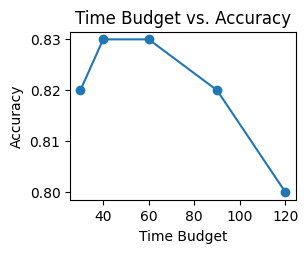

In [4]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, accuracy, marker='o')
plt.title('Time Budget vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

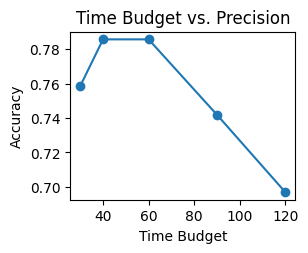

In [5]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, precision, marker='o')
plt.title('Time Budget vs. Precision')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')

Text(0.5, 0, 'Time Budget')

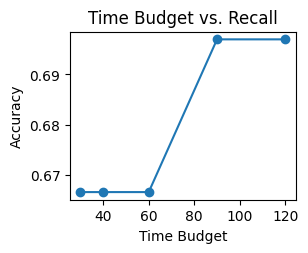

In [6]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.plot(time_budget, recall, marker='o')
plt.title('Time Budget vs. Recall')
plt.ylabel('Accuracy')
plt.xlabel('Time Budget')